# Sample Notebook for Picasso
This notebook shows some basic interaction with the .hdf5 files using the pandas library. The sample data was created using Picasso:Simulate.

## Localizations

In [1]:
# Import pandas and load localizations
import pandas as pd
locs_path = "data/testdata_locs.hdf5"
locs = pd.read_hdf(locs_path, key="locs")
locs.head(5)

,frame,x,y,photons,sx,sy,bg,lpx,lpy,net_gradient,likelihood,iterations
0,11,5.618027,5.306422,5788.195312,0.854633,0.854633,249.222168,0.018062,0.018066,12664.734375,-28.575684,3
1,12,5.503400,5.436996,19461.853516,0.829927,0.829927,249.945419,0.007742,0.007743,41411.078125,-27.649597,3
2,13,5.487249,5.458699,10565.259766,0.853265,0.853265,241.206253,0.011786,0.011787,21512.005859,-24.906677,3
3,13,5.607312,25.303150,15457.046875,0.836286,0.836286,248.649109,0.009025,0.009031,34505.566406,-27.552612,2
4,14,5.486778,5.425774,19542.046875,0.840351,0.840351,249.687531,0.007830,0.007831,41996.730469,-38.187439,2


In [2]:
# Summary statistics
locs.describe()

,frame,x,y,photons,sx,sy,bg,lpx,lpy,net_gradient,likelihood,iterations
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,531.074468,15.863409,15.325707,14798.202148,0.835975,0.835975,246.395142,0.011685,0.011686,32282.835938,-25.877790,2.987589
std,276.705635,8.323258,8.700739,7777.004395,0.015846,0.015846,3.643088,0.006277,0.006276,17196.302734,5.701668,0.603296
min,11.000000,5.348253,5.241615,2547.145508,0.807709,0.807709,235.592941,0.004461,0.004460,5036.297363,-47.541565,2.000000
25%,305.000000,5.617889,5.558584,8757.842529,0.825858,0.825858,243.774174,0.007764,0.007763,18791.521484,-29.021973,3.000000
50%,525.500000,15.512152,15.447953,14184.426758,0.832442,0.832442,246.256393,0.009467,0.009469,31070.669922,-25.128906,3.000000
75%,765.000000,25.487258,25.330721,19402.232422,0.840875,0.840875,248.732697,0.013167,0.013171,42138.875977,-21.940994,3.000000
max,990.000000,25.660690,25.711834,47905.289062,0.929139,0.929139,259.500000,0.035460,0.035442,107469.812500,-10.667358,8.000000


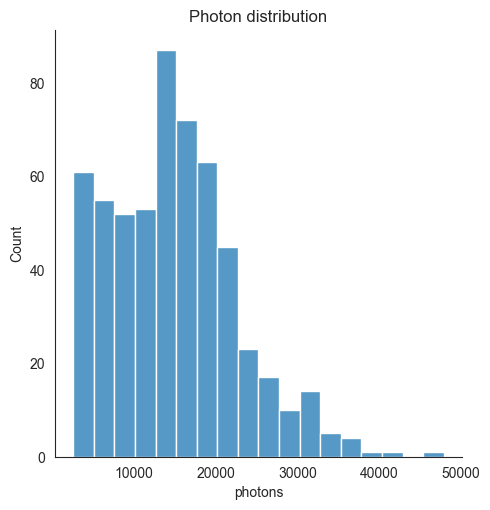

In [3]:
# Plot some basic statistics using seaborn, i.e. photon distribution   
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt

sns.displot(locs.photons.dropna(), kde=False)
plt.title('Photon distribution')
plt.show()

## Picked localizations

In [4]:
# load picked loaclizations 
picked = pd.read_hdf('data/testdata_locs_picked.hdf5', key='locs')
# Calculate mean of each column per group:
picked.groupby('group').mean().head()

,frame,x,y,photons,sx,sy,bg,lpx,lpy,net_gradient,likelihood,iterations
group,,,,,,,,,,,,
0,466.623377,5.513391,5.510079,14601.512695,0.837295,0.837295,246.463226,0.012361,0.012362,31865.687500,-26.175598,2.961039
1,617.123288,15.521152,5.451116,14305.125977,0.835689,0.835689,246.628525,0.011683,0.011683,31140.263672,-26.915300,2.972603
2,505.358491,15.500357,15.521691,17359.054688,0.832338,0.832338,246.227737,0.010514,0.010514,37712.707031,-25.888639,3.037736
3,485.018868,5.497772,15.465838,15385.262695,0.835399,0.835399,246.701874,0.010895,0.010897,33510.652344,-25.018280,3.000000
4,606.527273,5.471065,25.492254,12528.772461,0.837042,0.837042,246.604935,0.011731,0.011734,27225.615234,-25.638174,2.909091


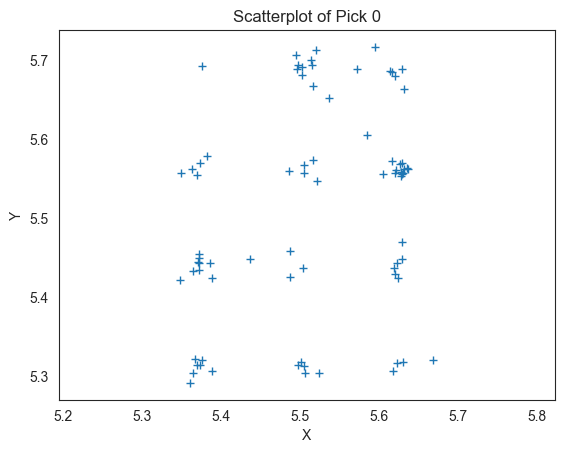

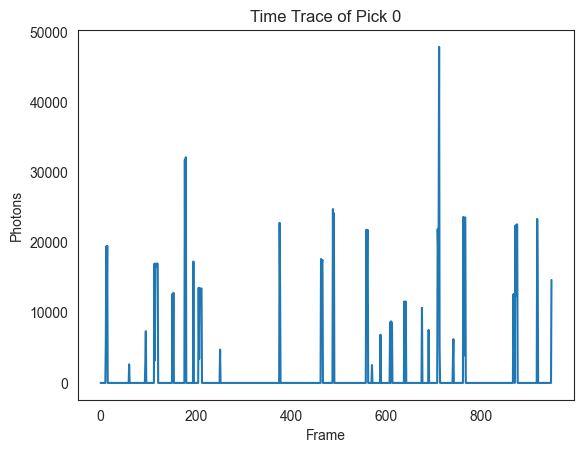

In [5]:
# Display a scatterplot of localizations of group 0
import numpy as np

# Select pick 0
pick_one = picked[picked.group == 0]

# Scatterplot
plt.plot(pick_one['x'], pick_one['y'],'+')
plt.axis('equal')
plt.title('Scatterplot of Pick 0')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Time trace with photon values
xvec = np.arange(max(pick_one["frame"]) + 1)
yvec = xvec[:] * 0
yvec[pick_one["frame"]] = pick_one['photons']

plt.plot(xvec, yvec)
plt.title('Time Trace of Pick 0')
plt.xlabel('Frame')
plt.ylabel('Photons')
plt.show()
